# Nanodegree Engenheiro de Machine Learning

## Projeto de conclusão de machine learning

## Projeto: Prevendo a existência de doenças cardíacas (Heart Disease UCI)

## Introdução

Doença cardíaca é um termo geral para informar as várias condições médicas crônicas ou aquelas que afetam um ou mais componentes do coração. Existem diversas formas de avaliar e diagnosticar a existência dessa doença (exames, sintomas e outros).
Uma análise, realizada no ano de 2015, estimou que 17,7 milhões de pessoas morreram por doenças cardiovasculares, representando 31% de todas as mortes em nível global. Esses números indicam a grande relevância do desenvolvimento de estudos em relação ao tema.

## Problema

Verificar a possibilidade da presença de doenças cardíacas em pessoas com base em informações de procedimentos comparadas às extraídas de um dataset no qual constam dados dos resultados de exames, testes outros procedimentos anteriormente realizados por diversas pessoas por ocasião de uma pesquisa. 
A solução será obtida por meio da variável alvo (res) tendo como resultados possíveis : 0 para negativo e 1 para positivo.

## Objetivo

O objetivo desse projeto é a utilização de algoritmos de machine learning para tentar obter os melhores resultados na previsão da possibilidade de uma pessoa possuir uma doença cardíaca (variável alvo, sendo 1 para possuí doença e 0 para não possuí doença). Também será realizada uma análise nas características dos dados para tentar encontrar quaisquer outras tendências que possam ajudar a prever certos eventos cardiovasculares ou encontrar quaisquer indicações claras de saúde do coração.
Na análise dos resultados serão utilizadas métricas (acurácia, precisão, recall e fscore) para verificar qual modelo terá o melhor desempenho.

## Conjunto de dados

O conjunto de dados utilizado será o Heart Disease UCI da plataforma Kaggle. Trata-se de um conjunto de dados oriundo de uma pesquisa de 5 Instituições Médicas, sendo que nesse caso será utilizado o conjunto da Cleveland Clinic Foundation.

### Importando as bibliotecas necessárias para o projeto

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# Exibição amigável para notebooks
%matplotlib inline
import seaborn as sns


### Coletando os dados

In [2]:
# Carregando os dados
data = pd.read_csv("heart.csv")

# Visualizando os primeiros registros
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### Explorando os dados

O dataset é um subconjunto com 14 atributos (originalmente eram 76 atributos) e 303 entradas.
Atributos:
> 1. age (idade em anos);
> 2. sex (1 para masculino e 0 para feminino); 
> 3. chest pain type (tipo de dor no peito, dividada em 4 valores); 
> 4. resting blood pressure (pressão arterial em repouso (em mmHg na admissão ao hospital)); 
> 5. serum cholestoral in mg/dl (colesterol sérico);
> 6. fasting blood sugar > 120 mg/dl (açucar no sangue em jejum ((1 = verdadeiro; 0 = falso));
> 7. resting electrocardiographic results (resultados eletrocardiográficos em repouso(valores 0,1,2));
> 8. maximum heart rate achieved (frequência cardíaca máxima alcançada);
> 9. exercise induced angina (angina induzida por exercício  (1 = sim; 0 = não));
> 10. oldpeak = ST depression induced by exercise relative to rest (depressão do segmento ST induzida pelo exercício em relação ao repouso); 
> 11. the slope of the peak exercise ST segment (a inclinação do segmento ST de pico do exercício);
> 12. number of major vessels (0-3) colored by flourosopy;
> 13. thal: 3 = normal; 6 = fixed defect; 7 = reversable defect.;
> 14. target (VARIAVEL ALVO) = sendo 1 para possuí doença e 0 para não possuí doença.


In [3]:
# Buscando informações gerais sobre o dataset e o tipo dos dados
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


In [4]:
# Buscando informações sobre a variável alvo

# Número total de registros.
n_records = data['target'].count()

# Número de registros com resultado positivo
res_pos = len(data[data.target == 1])

# Número de registros com resultado negativo
res_neg = len(data[data.target == 0])

# Percentual de indivíduos com resultado positivo
res_pos_percent = (float(res_pos) / float(n_records)) *100

# Percentual de indivíduos com resultado negativo
res_neg_percent = (float(res_neg) / float(n_records)) *100

# Exibindo os resultados
print("Total de registros: {}".format(n_records))
print("Resultados positivos: {}".format(res_pos))
print("Resultados negativos: {}".format(res_neg))
print("Percentual de indivíduos com resultado positivo: {:.2f}%".format(res_pos_percent))
print("Percentual de indivíduos com resultado negativo: {:.2f}%".format(res_neg_percent))

Total de registros: 303
Resultados positivos: 165
Resultados negativos: 138
Percentual de indivíduos com resultado positivo: 54.46%
Percentual de indivíduos com resultado negativo: 45.54%


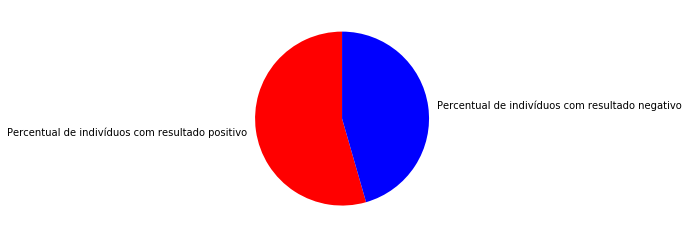

In [5]:
# Visualizando os resultados
fatias = [res_pos, res_neg]
atividade = ['Percentual de indivíduos com resultado positivo', 'Percentual de indivíduos com resultado negativo']
coluna = ['r', 'b']
 
# Criando um gráfico
plt.pie(fatias, labels = atividade , colors = coluna, startangle = 90)
 
plt.show()

In [6]:
# Verificando algumas estatísticas do dataset
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


#### Extraindo outras informações dos dados através de visualizações

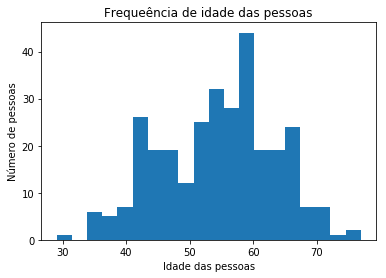

In [7]:
# Distribuição dos dados por idade
data.age.plot(kind='hist', bins=20)
plt.ylabel('Número de pessoas')
plt.xlabel('Idade das pessoas')
plt.title('Frequeência de idade das pessoas')
plt.show()

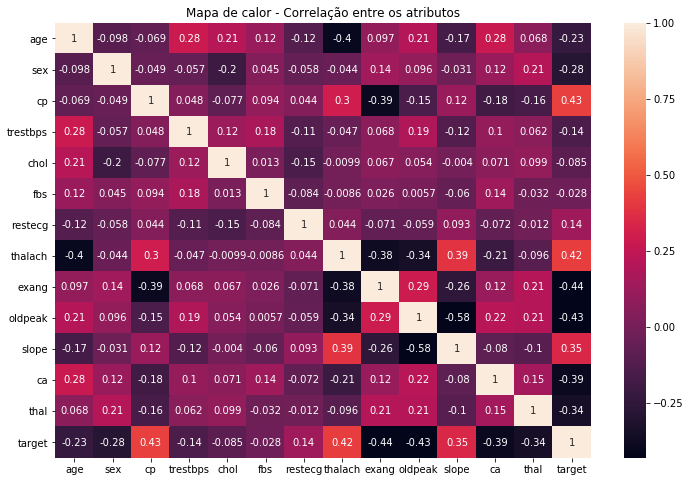

In [8]:
#Heat map para ver a correlação entre variáveis
plt.subplots(figsize=(12,8))
plt.title("Mapa de calor - Correlação entre os atributos")
sns.heatmap(data.corr(),robust=True,annot=True)

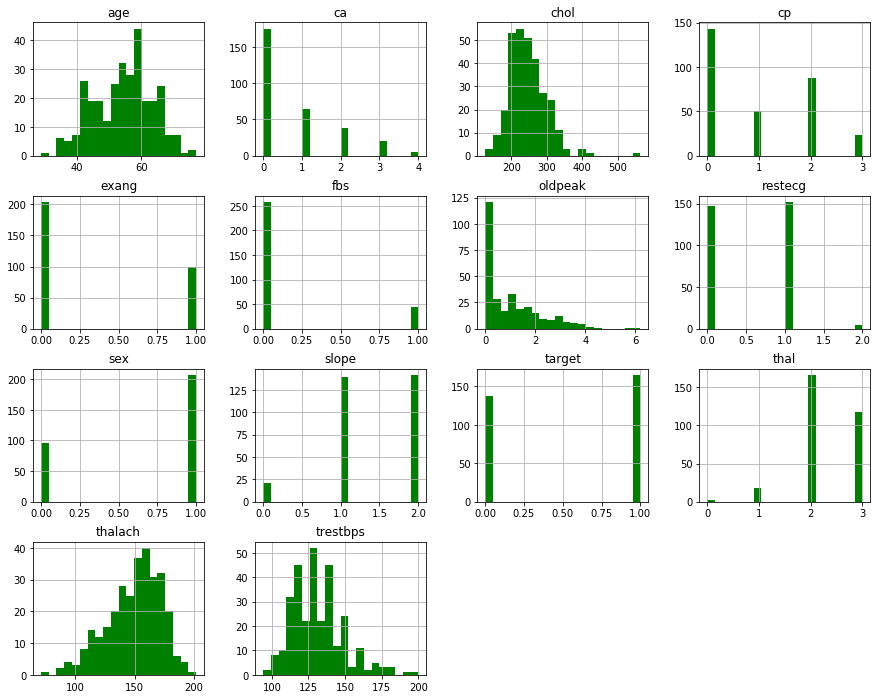

In [9]:
# Visualizando todas as características
data.hist(figsize=(15,12),bins = 20, color="g")
plt.title("Features Distribution")
plt.show()


Text(0, 0.5, 'Frequência')

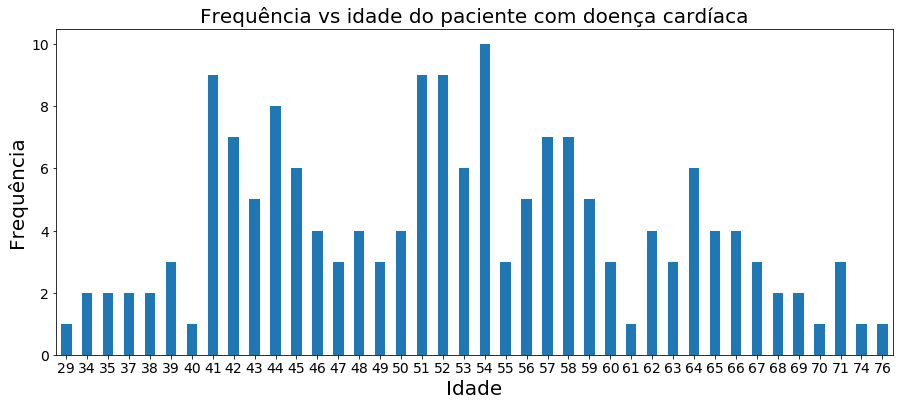

In [10]:
#Visualizando frequência vs idade do paciente com doença cardíaca

ax = data[data['target'] == 1]['age'].value_counts().sort_index().plot.bar(
    figsize=(15, 6),
    fontsize= 14,
    title="Frequência vs idade do paciente com doença cardíaca",
    rot=0)
ax.set_title("Frequência vs idade do paciente com doença cardíaca", fontsize=20)
ax.set_xlabel("Idade", fontsize=20)
ax.set_ylabel("Frequência", fontsize=20)

In [11]:
# Buscando informações sobre a variável sexo

# Número total de registros.
n_records_sex = data['sex'].count()

# Número de registros do sexo masculino
masc = len(data[data.sex == 1])

# Número de registros do sexo feminino
fem = len(data[data.sex == 0])

# Percentual de indivíduos do sexo feminino
masc_percent = (float(masc) / float(n_records_sex)) *100

# Percentual de indivíduos com resultado negativo
fem_percent = (float(fem) / float(n_records_sex)) *100

# Exibindo os resultados
print("Total de registros: {}".format(n_records_sex))
print("Indivíduos com sexo masculino: {}".format(masc))
print("Indivíduos com sexo feminino: {}".format(fem))
print("Percentual de indivíduos com sexo masculino: {:.2f}%".format(masc_percent))
print("Percentual de indivíduos com sexo feminino: {:.2f}%".format(fem_percent))

Total de registros: 303
Indivíduos com sexo masculino: 207
Indivíduos com sexo feminino: 96
Percentual de indivíduos com sexo masculino: 68.32%
Percentual de indivíduos com sexo feminino: 31.68%


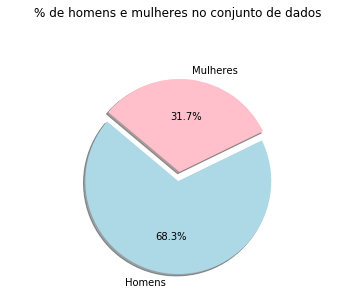

In [12]:
label = 'Homens','Mulheres'
sizes = [masc, fem]
colors = ['lightblue','pink']
explode = (0.1, 0)  # explode 1st slice
 
# Plot
plt.pie(sizes, explode=explode, labels=label, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('% de homens e mulheres no conjunto de dados\n\n\n')
plt.axis('equal')
plt.show()

Text(0, 0.5, 'Frequência')

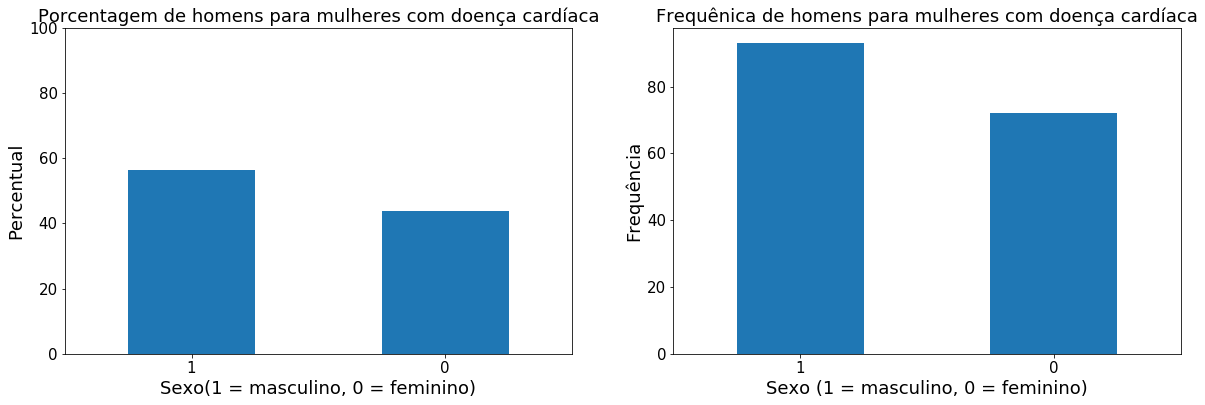

In [13]:
# Visualizando a relação de homens e mulheres com doenças cardíacas
fig, axarr = plt.subplots(1, 2, figsize=(20, 6))

((data[data['target'] == 1]['sex'].value_counts() / len(data[data['target'] == 1])) * 100).plot.bar(
    rot = 0,
    fontsize= 15,
    title='Porcentagem de homens para mulheres',
    ax=axarr[0])
axarr[0].set_title('Porcentagem de homens para mulheres com doença cardíaca', fontsize=18)
axarr[0].set_xlabel("Sexo(1 = masculino, 0 = feminino)", fontsize=18)
axarr[0].set_ylabel("Percentual", fontsize=18)
axarr[0].set_ylim([0,100])

data[data['target'] == 1]['sex'].value_counts().plot.bar(
    rot=0, 
    fontsize= 15,
    title='Frequênica de homens para mulheres',
    ax=axarr[1])
axarr[1].set_title('Frequênica de homens para mulheres com doença cardíaca', fontsize=18)
axarr[1].set_xlabel("Sexo (1 = masculino, 0 = feminino)", fontsize=18)
axarr[1].set_ylabel("Frequência", fontsize=18)

#### Verficando a existência de dados faltantes e outliers

In [14]:
# Verificando a existência de dados faltantes
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

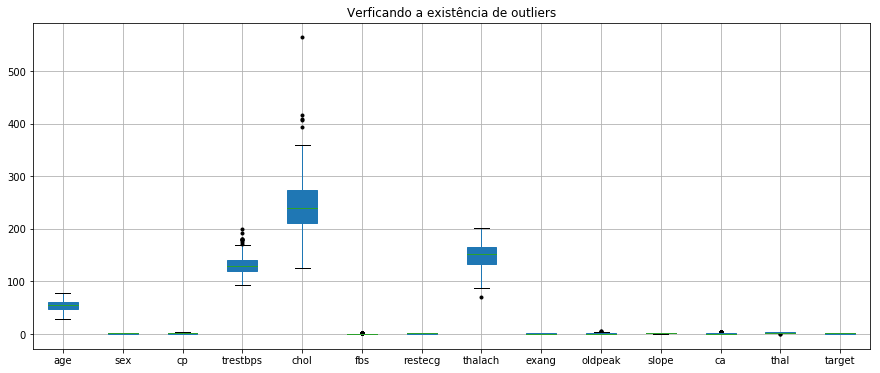

In [15]:
# Buscando a existência de outliers

plt.subplots(figsize=(15,6))
data.boxplot(patch_artist=True, sym="k.")
plt.title('Verficando a existência de outliers')
plt.show()

#### Tratamento dos outliers

In [16]:
# Criando uma função para localizar os outliers

def outliers(values):                     #define a função com uma variavel de entrada
    fator = 1.5                                #1.5 é o fator de multiplicacao
    q75, q25 = np.percentile(values, [75, 25]) #retorna o terceiro e primeiro quartil
    iqr = q75 - q25                            #calcula o iqr(interquartile range)

    lowpass = q25 - (iqr * fator)              #calcula o valor minimo para aplicar no filtro
    highpass = q75 + (iqr * fator)             #calcula o valor maximo para aplicar no filtro
    
    outliers = []                              # cria uma lista para os outliers

    for v in values:
        if v < lowpass or v > highpass:
            outliers.append(v)
            

    return outliers                             #retorna outliers


Devido às características das distribuições dos dados nos atributos "trestbps", "chol" e "thalach", será aplicada a mediana para o tratamento dos outliers.

In [17]:
data['trestbps'].median()

130.0

In [18]:
outliers(data['trestbps'])

[172, 178, 180, 180, 200, 174, 192, 178, 180]

In [19]:
data['trestbps'] = data['trestbps'].replace ([172, 178, 180, 180, 200, 174, 192, 178, 180], 130)

In [20]:
data['chol'].median()

240.0

In [21]:
outliers(data['chol'])

[417, 564, 394, 407, 409]

In [22]:
data['chol'] = data['chol'].replace ([417, 564, 394, 407, 409], 240)

In [23]:
data['thalach'].median()

153.0

In [24]:
outliers(data['thalach'])

[71]

In [25]:
data['thalach'] = data['thalach'].replace (71, 153)

In [26]:
# Dividindo os dados entre features e coluna alvo
target = data['target']
features_raw = data.drop('target', axis = 1)


#### Normalizando os dados

Adaptando a escala nos atributos numéricos. A escala original dos dados pode afetar nos resultados de alguns algoritmos de Machine Learning como SVM e KNN.

In [27]:
features_log_transformed = pd.DataFrame(data = features_raw)

In [28]:
# Importando sklearn.preprocessing.StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Inicializando um aplicador de escala e aplicando em seguida aos atributos
scaler = MinMaxScaler() # default=(0, 1)
numerical = ['age', 'cp', 'trestbps', 'chol', 'restecg', 'thalach', 'oldpeak', 'slope', 'ca', 'thal']

features_log_minmax_transform = pd.DataFrame(data = features_log_transformed)
features_log_minmax_transform[numerical] = scaler.fit_transform(features_log_transformed[numerical])

# Exibindo um exemplo de registro com a escala aplicada
display(features_log_minmax_transform.head(n=5))

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,0.708333,1,1.000000,0.671053,0.457265,1,0.0,0.543860,0,0.370968,0.0,0.0,0.333333
1,0.166667,1,0.666667,0.473684,0.529915,0,0.5,0.868421,0,0.564516,0.0,0.0,0.666667
2,0.250000,0,0.333333,0.473684,0.333333,0,0.0,0.736842,0,0.225806,1.0,0.0,0.666667
3,0.562500,1,0.333333,0.342105,0.470085,0,0.5,0.789474,0,0.129032,1.0,0.0,0.666667
4,0.583333,0,0.000000,0.342105,0.974359,0,0.5,0.657895,1,0.096774,1.0,0.0,0.666667


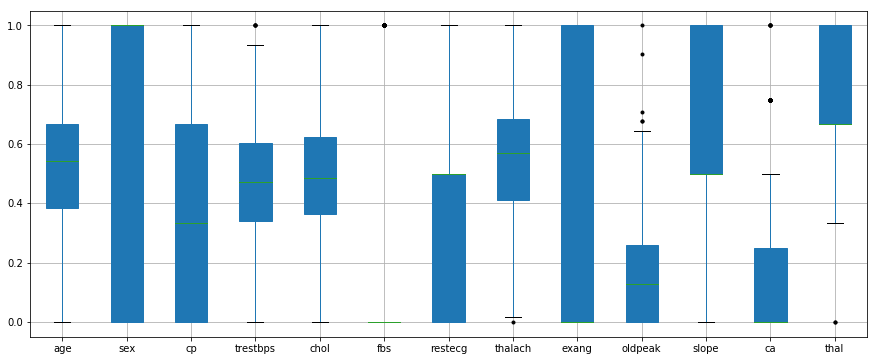

In [29]:
# Visualizando os dados tratados e normalizados
plt.subplots(figsize=(15,6))
features_log_minmax_transform.boxplot(patch_artist=True, sym="k.")
#plt.xticks(rotation=90)

In [30]:
# Visualizando os atributos
features_final = features_log_minmax_transform
list_features= list(features_final.columns)
print ("Total de atributos: {}.".format(len(list_features)))
print (list_features)

Total de atributos: 13.
['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']


### Treinamento e Avaliação do Modelo

#### Dividindo os dados para treinamento e teste

In [31]:
# Importando train_test_split
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split

# Dividir os 'atributos' e 'income' entre conjuntos de treinamento e de testes.
X_train, X_test, y_train, y_test = train_test_split(features_final, 
                                                    target, 
                                                    test_size = 0.2, 
                                                    random_state = 0)

print("Amostras para treinamento: {}.".format(X_train.shape[0]))
print("Amostras para teste: {}.".format(X_test.shape[0]))

Amostras para treinamento: 242.
Amostras para teste: 61.


#### Aplicando o modelo de referência e verificando os resultados

Como modelo de referência será utilizado um modelo naive predictor que prediz o resultado sempre como 0 (não possui doença). O propósito ao gerar um naive predictor é simplesmente exibir como um modelo sem nenhuma inteligência se comporta em relação ao problema apresentado. Esse modelo  será utilizado como base para comparação com os outros modelos posteriormente aplicados.

In [32]:
TP = 0 # Como o modelo prediz todos os resultados como negativo, não há valores positivos
FP = 0
TN = target.count() - np.sum(target)
FN = np.sum(target)


accuracy = (TP + TN) / (TP + FP + TN + FN)
#recall = TP / (TP + FN)
#precision = TP / (TP + FP)
#fscore = (1 + 0.5**2) * (precision * recall) / ((0.5**2 * precision) + recall)

# Exibindo os resultados 
print("Naive Predictor: [Accuracy score: {:.4f}].".format(accuracy))
# Considerando que não há positivos ou falsos positivos, a única métrica a apurar, nesse caso,  é a acurácia, sendo que as demais métricas poderiam resultar em divisão por zero.

Naive Predictor: [Accuracy score: 0.4554].


### Aplicando Modelos de Aprendizado Supervisionado

Serão aplicados os algoritmos AdaBoost, Support Vector Machines (SVM) e Logistic Regression.<br />
Para avaliar adequadamente a performance de cada um dos modelos será criado um pipeline de treinamento e predição para treinar os modelos utilizando vários tamanhos de conjuntos de dados para treinamento, além de performar predições nos dados de teste. 


In [33]:
# Função para aplicação de treinamento e teste nos modelos de aprendizagem e resultados apresentação dos resultados
from time import time
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
def train_predict(learner, sample_size, X_train, y_train, X_test, y_test): 
       
    results = {}    
   
    start = time() # marcando o início do tempo
    learner = learner.fit(X_train[:sample_size], y_train[:sample_size])
    end = time() # marcando o final do tempo
  
    results['train_time'] = end - start # tempo de treinamento
        
    start = time()  # marcando o início do tempo
    predictions_test = learner.predict(X_test)
    predictions_train = learner.predict(X_train)
    end = time() # marcando o final do tempo
    
    results['pred_time'] = end - start # tempo predição
            
    # Verificando os resultados com as métricas acurácia, precisão, recall e f1-score
    results['acc_train'] = accuracy_score(y_train, predictions_train)     
    results['acc_test'] = accuracy_score(y_test, predictions_test)
    
    results['prec_train'] = precision_score(y_train, predictions_train)     
    results['prec_test'] = precision_score(y_test, predictions_test)
    
    results['rec_train'] = recall_score(y_train, predictions_train)     
    results['rec_test'] = recall_score(y_test, predictions_test)
    
    results['f_train'] = f1_score(y_train, predictions_train)        
    results['f_test'] = f1_score(y_test, predictions_test)
       
    
    print ("{} treinado em {} amostras.".format(learner.__class__.__name__, sample_size))
            
    # Retornando os resultados
    return results

In [43]:
# Importando os três modelos de aprendizado supervisionado da sklearn
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

# Inicializando os três modelos
clf_Ada = AdaBoostClassifier(random_state=25)
clf_SVC = SVC(random_state=25)
clf_LR = LogisticRegression(random_state=25)

# Calculando o número de amostras para 10%, 50% e 100% dos dados de treinamento

samples_100 = len(y_train)
samples_50 = int(len(y_train)/2)
samples_10 = int(len(y_train)/10)

# Coletando os resultados dos algoritmos de aprendizado
results = {}
for clf in [clf_Ada, clf_SVC, clf_LR]:
    clf_name = clf.__class__.__name__
    results[clf_name] = {}
    for i, samples in enumerate([samples_10, samples_50, samples_100]):
        results[clf_name][i] = \
        train_predict(clf, samples, X_train, y_train, X_test, y_test)
        
print(results)

AdaBoostClassifier treinado em 24 amostras.
AdaBoostClassifier treinado em 121 amostras.
AdaBoostClassifier treinado em 242 amostras.
SVC treinado em 24 amostras.


C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433

SVC treinado em 121 amostras.
SVC treinado em 242 amostras.
LogisticRegression treinado em 24 amostras.
LogisticRegression treinado em 121 amostras.
LogisticRegression treinado em 242 amostras.
{'AdaBoostClassifier': {0: {'train_time': 0.41603755950927734, 'pred_time': 0.011968374252319336, 'acc_train': 0.7892561983471075, 'acc_test': 0.7377049180327869, 'prec_train': 0.7898550724637681, 'prec_test': 0.7647058823529411, 'rec_train': 0.8320610687022901, 'rec_test': 0.7647058823529411, 'f_train': 0.8104089219330856, 'f_test': 0.7647058823529412}, 1: {'train_time': 0.04189300537109375, 'pred_time': 0.011963367462158203, 'acc_train': 0.8801652892561983, 'acc_test': 0.7868852459016393, 'prec_train': 0.8923076923076924, 'prec_test': 0.8, 'rec_train': 0.8854961832061069, 'rec_test': 0.8235294117647058, 'f_train': 0.888888888888889, 'f_test': 0.8115942028985507}, 2: {'train_time': 0.045876264572143555, 'pred_time': 0.0109710693359375, 'acc_train': 0.9297520661157025, 'acc_test': 0.852459016393

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


#### Visulizando os resultados dos algortimos com 100% das amostras

Scores / Algoritmos | AdaBoostClassifier | Support Vector Machines -SVC| Logistic Regression
:--------| :------- | :-------- | :--------
**Acurácia no treinamento**| 0.9297520661157025 | 0.8264462809917356 | 0.8347107438016529
**Acurácia no teste** | 0.8524590163934426 | 0.819672131147541 | 0.8524590163934426
**Precisão no treinamento** |0.9253731343283582 | 0.7947019867549668 | 0.8226950354609929
**Precisão no teste** | 0.8787878787878788 | 0.7948717948717948  | 0.8378378378378378
**Recall no treinamento**| 0.9465648854961832 | 0.916030534351145 | 0.8854961832061069
**Recall no teste**| 0.8529411764705882 | 0.9117647058823529 | 0.9117647058823529
**F1-score no treinamento** | 0.9358490566037737 | 0.851063829787234 | 0.8529411764705882
**F1-score no teste** | 0.8656716417910447 | 0.8493150684931507 | 0.8732394366197184

Os resultados desses classificadores foram bem melhores quando comparados ao resultado do **Naive Predictor** (Acurácia: 0.4554).


#### Descrevendo o modelo que apresentou o melhor desempenho até o momento (AdaBoostClassifier).

* O Classificador Adaboost é um algoritmo que faz parte da abordagem dos métodos de aprendizado Ensemble. Ele combina vários classificadores de baixo desempenho para que você obtenha um classificador forte de alta precisão. Esse modelo de algoritmo, por suas características, foi o que demonstrou o melhor desempenho diante da base de dados, tendo o melhor resultado dentre os três modelos testados. Os modelos foram avaliados a partir de métricas que buscaram verificar a assertividade e a precisão, buscando um bom alinhamento com o objetivo.



#### Otimizando o resultado

É possível melhorar o resultado refinando o modelo AdaBoostClassifier.


In [42]:
# Importando 'GridSearchCV', 'make_scorer'
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier # base_estimator do classificador AdaBoost

#Inicializar o classificador
clf = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(random_state=25), random_state=25)

# Lista de parâmetros
parameters = {'n_estimators': [30, 40, 50], 'learning_rate':[.5, .8, 1],  'base_estimator__max_depth': [2, 4, 6],
              'base_estimator__min_samples_split': [6, 7]}
                        
scorer = make_scorer(precision_score)

#Realizando uma busca grid no classificador utilizando o 'scorer' como o método de score no GridSearchCV() 
grid_obj = GridSearchCV(clf, parameters, scorer)

# Adequando o objeto da busca grid como os dados para treinamento e encontrar os parâmetros ótimos utilizando fit() 
grid_fit = grid_obj.fit(X_train, y_train)

# Recuperando o estimador
best_clf = grid_fit.best_estimator_

# Realizando predições utilizando o modelo não otimizado e modelar
predictions = (clf.fit(X_train, y_train)).predict(X_test)
best_predictions = best_clf.predict(X_test)

# Reportando os scores de antes e de depois
print("Modelo não otimizado\n------")
print("Acurácia no teste: {:.4f}".format(accuracy_score(y_test, predictions)))
print("Precisão no teste: {:.4f}".format(precision_score(y_test, predictions)))
print("Recall no teste: {:.4f}".format(recall_score(y_test, predictions)))
print("F1-score no teste: {:.4f}".format(f1_score(y_test, predictions)))
print("\nModelo otimizado\n------")
print("Acurácia no teste: {:.4f}".format(accuracy_score(y_test, best_predictions)))
print("Precisão no teste: {:.4f}".format(precision_score(y_test, best_predictions)))
print("Recall no teste: {:.4f}".format(recall_score(y_test, best_predictions)))
print("F1-score no teste: {:.4f}".format(f1_score(y_test, best_predictions)))


Modelo não otimizado
------
Acurácia no teste: 0.7705
Precisão no teste: 0.8333
Recall no teste: 0.7353
F1-score no teste: 0.7812

Modelo otimizado
------
Acurácia no teste: 0.8852
Precisão no teste: 0.9091
Recall no teste: 0.8824
F1-score no teste: 0.8955


C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


#### Avaliando os resultados (Validação final do modelo)

Conforme o gráfico abaixo é possível comparar os resultados de todos os classificadores testados (métrica utilizada acurácia)

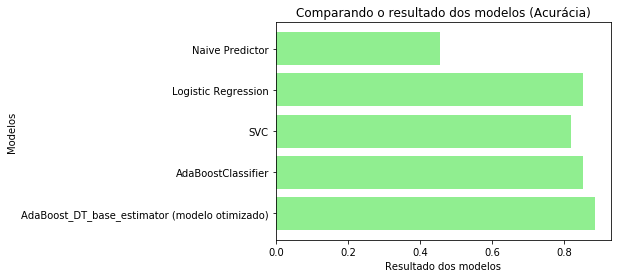

In [36]:
resultados_modelos = [0.8852, 0.8524, 0.8196, 0.8524, 0.4554]
modelos = ['AdaBoost_DT_base_estimator (modelo otimizado)', 'AdaBoostClassifier',
           'SVC', 'Logistic Regression', 'Naive Predictor']

plt.barh(modelos, resultados_modelos, color = 'lightgreen')
plt.ylabel('Modelos')
plt.xlabel('Resultado dos modelos')
plt.title('Comparando o resultado dos modelos (Acurácia)')
plt.show()

#### Importância das features

Outra informação interessante para se constatar é a importância de cada atributo dos registros do conjunto de dados quando realizamos predições baseadas no algoritmo escolhido (AdaBoost_DT_base_estimator (modelo otimizado)).

[0.16 0.06 0.02 0.1  0.16 0.   0.   0.14 0.04 0.12 0.02 0.14 0.04]


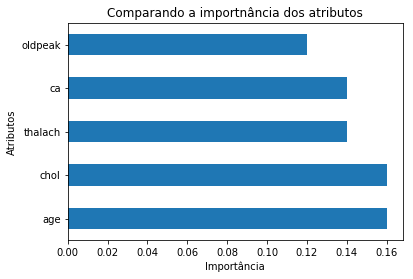

In [44]:
model = AdaBoostClassifier().fit(X_train, y_train)
importances = model.feature_importances_

print(importances)

(pd.Series(model.feature_importances_, index=features_final.columns)
   .nlargest(5)
   .plot(kind='barh'))
plt.ylabel('Atributos')
plt.xlabel('Importância')
plt.title('Comparando a importnância dos atributos')
plt.show()

### Conclusão

#### Análise dos dados
Utilizando técnicas de Análise de Dados e Machine Learning, durante a execução desse trabalho, na tentativa de encontrar tendências, foi possível constatar:
* A base de dados possuia o total de 303 registros, sendo que em relação à variável alvo (possui doença) havia 165 resultados positivos e 138 resultados negativos, mostrando que as classes eram balanceadas (54.46% e 45,54%);
* Em relação à idade havia registros de pessoas com 29 a 76 anos. As distribuições dos números de pessoas em relação às pessoas com doença, bem como o mapa de calor não apresentaram correlação direta entre a variável alvo e a idade. Contudo, para o algoritmo que obteve o melhor desempenho a variável idade foi considerada uma das mais importantes;
* Em relação ao sexo o conjunto possuia o percentual de indivíduos do sexo masculino de 68.32% e do sexo feminino de 31.68%. Das informações extraídas nas imagens (mapa do calor e histogramas) não foi possível afirmar que esse atributo tinha forte relação com a variável alvo.
* Conforme o mapa de calor, mostraram correlação positiva com a variável alvo as características "cp" - chest pain type (tipo de dor no peito), "resteceg" - resting electrocardiographic results (resultados eletrocardiográficos em repouso(valores 0,1,2));, "thalach" - maximum heart rate achieved (frequência cardíaca máxima alcançada) e "slope" - the slope of the peak exercise ST segment (a inclinação do segmento ST de pico do exercício). Já para o algortimo de Machine Learning que obteve os melhores resultados nas predições as características mais importantes foram: idade, colesterol sérico, frequência cardíaca máxima alcançada, número de grandes vasos(number of major vessels (0-3) colored by flourosopy) e depressão do segmento ST induzida pelo exercício em relação ao repouso. Diante disso, é possível constatar que o atributo "frequência cardíaca máxima alcançada" teve grande influência nos resultados.

#### Classificação e predição com algoritmos de Machine Learning

Em relação às predições foram utilizados um modelo de referência (Naive Predictor) e mais três algoritmos AdaBoost, Support Vector Machines (SVM) e Logistic Regression. Após, foi realizada a verificação dos resultados utilizando as seguintes métricas: 
acurácia, precisão, recall e f1-score.<br />
Durante a verificação dos resultados foi constatado que o algoritmo que obteve o melhor resultado foi o AdaBoostClassifier.<br />
Constatado o melhor resultado, foi realizada uma otimização dos parâmetros do algoritmo AdaBoostClassifier com a inclusão do  classificador DecisionTreeClassifier como *base estimator*, bem como a inclusão de números de estimadores, taxas de aprendizagem e mais dois parâmetros vinculados ao estimador base.<br />

O resultado final obtido pelo modelo otimizado foi: 
* Acurácia no teste: 0.8852
* Precisão no teste: 0.9091
* Recall no teste: 0.8824
* F1-score no teste: 0.8955

Cabe ressaltar que, além de um bom resultado na acurácia, o modelo também obteve bons resultados na precisão e recall, que são métricas importantes para o estudo. O recall identificaria pessoas possivelmente com resultado positivo para uma primeira análise em razão da divisão das classes, mas necessitaria de um trabalho posterior de investigação. A precisão informa que as pessoas indicadas com resultado positivo teriam grande probabilidade de terem, efetivamente, a doença.